In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# *Carga, limpieza y transformacion de datos

In [46]:
df_bank = pd.read_csv('../data/bank-additional.csv', index_col = 0)
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
19154,NaN,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,999,0,NONEXISTENT,1.4,"93,444","-36,1",NaN,"5228,1",yes,13-octubre-2015,38.147,-105.582,4eed05de-2a98-4227-b488-32122009b638
26206,34.0,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,7,999,0,NONEXISTENT,-0.1,"93,2",-42,NaN,"5195,8",no,17-marzo-2018,49.235,-112.201,0f0aca88-4088-4fe2-905f-44fb675d9493
15046,NaN,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,15-septiembre-2016,40.679,-120.015,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
15280,NaN,admin.,MARRIED,university.degree,NaN,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,958","5228,1",no,23-septiembre-2019,27.772,-117.518,5f432048-d515-4bb5-9c94-62db451f88d4
27570,NaN,unemployed,SINGLE,university.degree,0.0,0.0,1.0,cellular,104,2,999,0,NONEXISTENT,-0.1,"93,2",-42,"4,021","5195,8",no,6-noviembre-2019,41.146,-105.026,993bbbd6-4dbc-4a40-a408-f91f8462bee6


In [47]:
df_bank.info()



<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

# Los datos: bank-additional.csv

Las columnas que tenemos en el primer dataset ('bank-additional.csv') son:

**`age`**: La edad del cliente.

**`job`**: La ocupación o profesión del cliente.

**`marital`**: El estado civil del cliente.

**`education`**: El nivel educativo del cliente.

**`default`**: Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No).

**`housing`**: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).

**`loan`**: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).

**`contact`**: El método de contacto utilizado para comunicarse con el cliente.

**`duration`**: La duración en segundos de la última interacción con el cliente.

**`campaign`**: El número de contactos realizados durante esta campaña para este cliente.

**`pdays`**: Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña.

**`previous`**: Número de veces que se ha contactado con el cliente antes de esta campaña.

**`poutcome`**: Resultado de la campaña de marketing anterior.

**`emp.var.rate`**: La tasa de variación del empleo.

**`cons.price.idx`**: El índice de precios al consumidor.

**`cons.conf.idx`**: El índice de confianza del consumidor.

**`euribor3m`**: La tasa de interés de referencia a tres meses.

**`nr.employed`**: El número de empleados.

**`y`**: Indica si el cliente ha suscrito un producto o servicio (Sí/No).

**`date`**: La fecha en la que se realizó la interacción con el cliente.

**`contact_month`**: Mes en el que se realizó la interacción con el cliente durante la campaña de marketing.

**`contact_year`**: Año en el que se realizó la interacción con el cliente durante la campaña de marketing.

**`id_`**: Un identificador único para cada registro en el dataset.

In [48]:
df_bank.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

### Vamos a rellenar los valores nulos de la tabla y,en algunos casos,cambiar valores que estan como float a int,ya que no tiene sentido que sean decimales, o al contrario, para poder operar con ellos

In [49]:
df_bank.loc[:,'age'] = df_bank['age'].fillna(0).astype(int)


In [50]:
df_bank['job'] = df_bank['job'].fillna('unknown')

In [51]:
df_bank['marital'] = df_bank['marital'].fillna('unknown')

In [52]:
df_bank['education'] = df_bank['education'].fillna('unknown')

In [53]:
df_bank.loc[:, 'default'] = df_bank['default'].fillna(-1).astype(int)

In [54]:
df_bank.loc[:,'housing'] = df_bank['housing'].fillna(-1).astype(int)

In [55]:
df_bank.loc[:,'loan'] = df_bank['loan'].fillna(-1).astype(int)

In [56]:
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].str.replace(',', '.', regex=False)
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].astype(float)

In [57]:
df_bank['cons.price.idx'].isna().sum()

np.int64(471)

In [58]:
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].fillna(df_bank['cons.price.idx'].median())

In [59]:
df_bank['cons.conf.idx'] = df_bank['cons.conf.idx'].str.replace(',', '.', regex=False)
df_bank['cons.conf.idx'] = df_bank['cons.conf.idx'].astype(float)

In [60]:
df_bank['euribor3m'] = df_bank['euribor3m'].str.replace(',', '.', regex=False)
df_bank['euribor3m'] = pd.to_numeric(df_bank['euribor3m'], errors='coerce') #Tuve que mirarlo con ayuda porque no me dejaba convertirlo y no sabia porque
df_bank['euribor3m'] = df_bank['euribor3m'].fillna(df_bank['euribor3m'].median())


In [61]:
df_bank = df_bank.dropna(subset = ['date'])

In [62]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42752 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42752 non-null  float64
 1   job             42752 non-null  object 
 2   marital         42752 non-null  object 
 3   education       42752 non-null  object 
 4   default         42752 non-null  float64
 5   housing         42752 non-null  float64
 6   loan            42752 non-null  float64
 7   contact         42752 non-null  object 
 8   duration        42752 non-null  int64  
 9   campaign        42752 non-null  int64  
 10  pdays           42752 non-null  int64  
 11  previous        42752 non-null  int64  
 12  poutcome        42752 non-null  object 
 13  emp.var.rate    42752 non-null  float64
 14  cons.price.idx  42752 non-null  float64
 15  cons.conf.idx   42752 non-null  float64
 16  euribor3m       42752 non-null  float64
 17  nr.employed     42752 non-null  obje

### Vamos a cambiar el tipo de valores de algunas columnas numericas que estan con tipo float y lo pasamos a int, ya que no tiene sentido

In [90]:
df_bank['age'] = df_bank['age'].astype('int')

In [64]:
df_bank['default'] = df_bank['default'].astype('int')
df_bank['housing'] = df_bank['housing'].astype('int')
df_bank['loan'] = df_bank['loan'].astype('int')

In [65]:
df_bank['id_'].duplicated().sum()

np.int64(0)

In [66]:
df_bank.drop(columns=['id_'], inplace=False).duplicated().sum()

np.int64(0)

In [67]:
df_bank.shape

(42752, 23)

In [68]:
df_bank['cons.price.idx'].isnull().sum()

np.int64(0)

### Ahora cargamos el archivo excel. Lo hacemos de la siguiente manera ya que el archivo tiene 3 hojas y queremos leer todas las hojas. Si lo intentamos de una,solo nos cargara la primera hoja. Se especifican las hojas y luego las juntamos con concat.

In [69]:
archivo = pd.read_excel('../data/customer-details.xlsx', sheet_name=None, index_col = 0)
df_customer = pd.concat(archivo.values(), ignore_index=True)
df_customer.head()


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [70]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


# Los datos: customer-details.xlsx

El segundo set de datos ('customer-details.xlsx') es un archivo Excel que nos da información sobre las características demográficas y comportamiento de compra de los clientes del banco. Este Excel consta de 3 hojas de trabajo diferentes, en cada una de ellas tenemos los clientes que entraron en el banco en diferentes años. Sus columnas son:

**`Income`**: Representa el ingreso anual del cliente en términos monetarios.

**`Kidhome`**: Indica el número de niños en el hogar del cliente.

**`Teenhome`**: Indica el número de adolescentes en el hogar del cliente.

**`Dt_Customer`**: Representa la fecha en que el cliente se convirtió en cliente de la empresa.

**`NumWebVisitsMonth`**: Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.

**`ID`**: Identificador único del cliente.

In [71]:
df_customer.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [72]:
df_customer.drop(columns=['ID'], inplace=False).duplicated().sum()

np.int64(0)

### Union de las dos tablas

In [73]:
df_complete = pd.merge(df_bank, df_customer, left_on='id_', right_on='ID', how='left')
df_complete.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,housemaid,MARRIED,basic.4y,0,0,0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,MARRIED,high.school,-1,0,0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,MARRIED,high.school,0,1,0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,MARRIED,basic.6y,0,0,0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,MARRIED,high.school,0,0,1,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [74]:
df_complete.duplicated().sum()

np.int64(0)

In [75]:
comprobar_id = {
    'iguales': (df_complete['id_'] == df_complete['ID']).sum(),
    'diferentes': (df_complete['id_'] != df_complete['ID']).sum()
    }

print(comprobar_id)


{'iguales': np.int64(42752), 'diferentes': np.int64(0)}


In [76]:
df_complete = df_complete.drop(['id_', 'ID'], axis=1)


# Analisis descriptivo

In [77]:
df_complete.describe().T

,count,mean,min,25%,50%,75%,max,std
age,42752.0,35.223452,0.0,30.0,36.0,46.0,98.0,16.237013
default,42752.0,-0.209019,-1.0,0.0,0.0,0.0,1.0,0.406786
housing,42752.0,0.499368,-1.0,0.0,1.0,1.0,1.0,0.545555
loan,42752.0,0.127994,-1.0,0.0,0.0,0.0,1.0,0.399047
duration,42752.0,257.766186,0.0,102.0,179.0,319.0,4918.0,258.778698
campaign,42752.0,2.566383,1.0,1.0,2.0,3.0,56.0,2.770606
pdays,42752.0,962.373877,0.0,999.0,999.0,999.0,999.0,187.15456
previous,42752.0,0.174237,0.0,0.0,0.0,0.0,7.0,0.497828
emp.var.rate,42752.0,0.07733,-3.4,-1.8,1.1,1.4,1.4,1.573703
cons.price.idx,42752.0,93.576226,92.201,93.075,93.749,93.994,94.767,0.576815


In [78]:
df_complete['job'].value_counts()

job
admin.           10802
blue-collar       9605
technician        6984
services          4135
management        3036
retired           1782
entrepreneur      1509
self-employed     1483
housemaid         1117
unemployed        1059
student            896
unknown            344
Name: count, dtype: int64

In [79]:
df_complete['y'].value_counts(normalize=True)

y
no     0.887467
yes    0.112533
Name: proportion, dtype: float64

In [80]:
df_complete.corr(numeric_only=True)

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,latitude,longitude,Income,Kidhome,Teenhome,NumWebVisitsMonth
age,1.000000,-0.089228,0.002122,-0.000476,0.003094,0.008368,-0.020346,0.010601,-0.000425,0.002819,0.073389,0.004697,0.001004,0.006586,0.010163,0.000443,-0.001239,-0.004349
default,-0.089228,1.000000,0.019432,0.007170,0.010406,-0.032394,-0.080725,0.103955,-0.203920,-0.168076,-0.024018,-0.163496,-0.001050,0.001372,0.003608,-0.002245,-0.000032,-0.001990
housing,0.002122,0.019432,1.000000,0.226438,-0.006560,-0.009451,-0.009698,0.014917,-0.054761,-0.078013,-0.033699,-0.052112,0.000481,-0.003228,-0.001067,-0.000413,0.007514,-0.005430
loan,-0.000476,0.007170,0.226438,1.000000,0.000674,0.004057,-0.000991,-0.002994,0.000129,-0.011542,-0.013965,-0.004190,0.001874,-0.000141,0.001997,-0.004860,0.007214,-0.005053
duration,0.003094,0.010406,-0.006560,0.000674,1.000000,-0.072218,-0.048102,0.021408,-0.027643,0.005318,-0.007430,-0.030437,-0.004202,0.003463,-0.003019,-0.000179,-0.005603,0.000418
campaign,0.008368,-0.032394,-0.009451,0.004057,-0.072218,1.000000,0.053325,-0.079554,0.152238,0.127963,-0.012714,0.116185,-0.010107,-0.000594,-0.004934,-0.006781,0.000748,0.003872
pdays,-0.020346,-0.080725,-0.009698,-0.000991,-0.048102,0.053325,1.000000,-0.589172,0.270653,0.076721,-0.092365,0.260127,0.001039,0.002578,0.004081,0.000742,0.004258,-0.001612
previous,0.010601,0.103955,0.014917,-0.002994,0.021408,-0.079554,-0.589172,1.000000,-0.419228,-0.199584,-0.048988,-0.386046,0.011845,-0.010962,-0.002989,-0.000728,-0.003184,-0.001775
emp.var.rate,-0.000425,-0.203920,-0.054761,0.000129,-0.027643,0.152238,0.270653,-0.419228,1.000000,0.770982,0.191982,0.815718,-0.008600,0.000773,-0.009002,-0.003946,0.000438,-0.007222
cons.price.idx,0.002819,-0.168076,-0.078013,-0.011542,0.005318,0.127963,0.076721,-0.199584,0.770982,1.000000,0.055480,0.570636,-0.004464,-0.002799,-0.011153,0.000931,0.003772,-0.004496


## Visualizacion de Datos

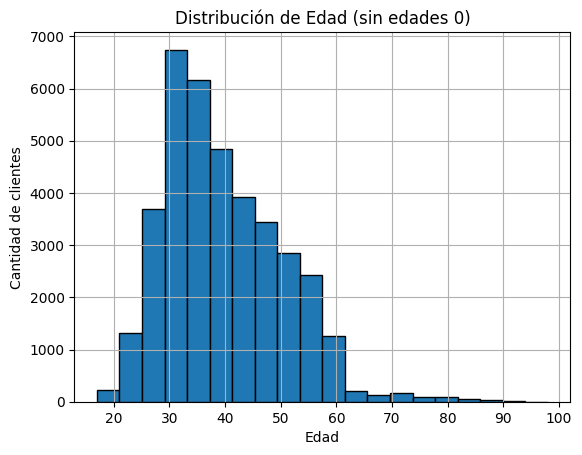

In [81]:
df_complete[df_complete['age'] != 0]['age'].hist(bins=20, edgecolor='black')
plt.title("Distribución de Edad (sin edades 0)")
plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.show()

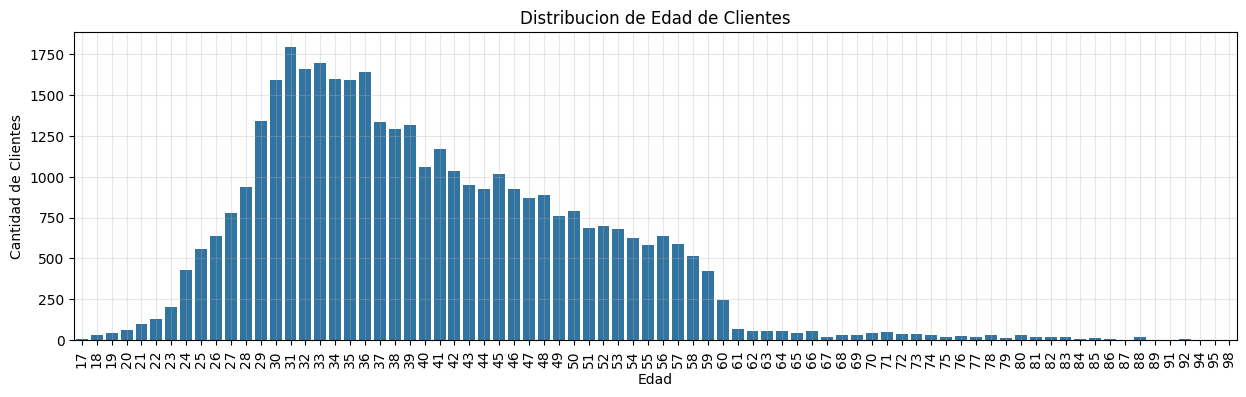

In [82]:
df_sin_edad_cero = df_complete[df_complete['age'] != 0]
# Inicializar una figura
plt.figure(figsize=(15, 4))

sns.countplot(data=df_sin_edad_cero, x='age')

plt.title('Distribucion de Edad de Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.grid(alpha=0.3)
plt.xticks(rotation=90)

plt.show()

### Vemos que las grafica tienen un sesgo positivo, y que se concentran la mayoria de clientes entre los 25 y 45 años. Por lo tanto, la estrategia de marketing debe enfocarse en este rango de edad, ya que tiene logica por que son los que tienen mas probabilidades de contratar nuestros productos.
### Por otro lado vemos una caida en la cantidad de clientes entre los 45 y 59 años, y una caida mas aguda de los 60 años en adelante. Viendo estos datos  podemos decir que deberiamos centrar mas esfuerzo en el primer rango de edad ya que tienen mas probabilidades de contratar nuestros productos.

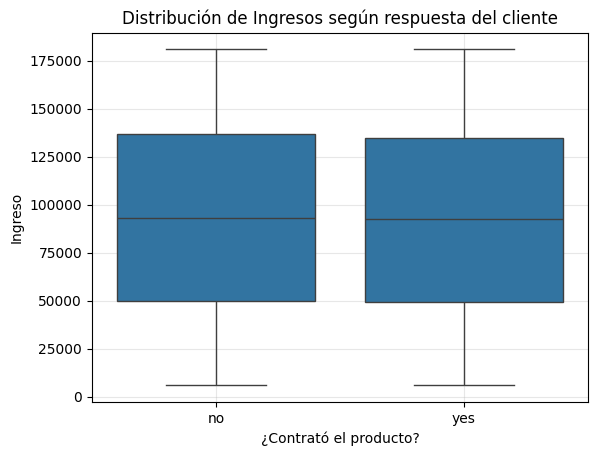

In [83]:
sns.boxplot(x='y', y='Income', data=df_complete)
plt.title('Distribución de Ingresos según respuesta del cliente')
plt.xlabel('¿Contrató el producto?')
plt.ylabel('Ingreso')
plt.grid(alpha=0.3)
plt.show()

### Los ingresos no parecen ser algo que haga diferencia a la hora de decidir sin contratan o no.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

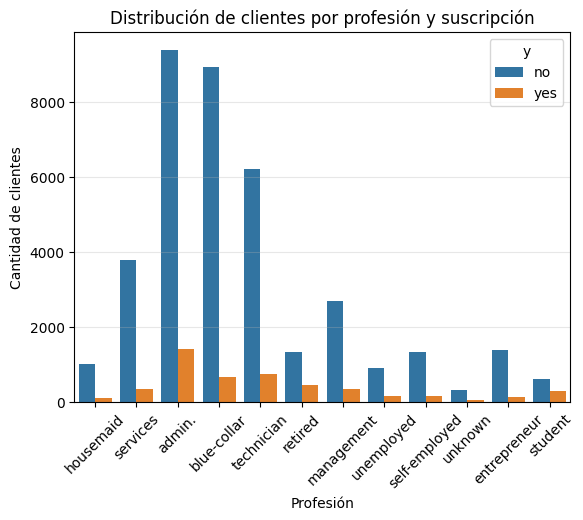

In [84]:
sns.countplot(x='job', hue='y', data=df_complete)
plt.title('Distribución de clientes por profesión y suscripción')
plt.xlabel('Profesión')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

### Aqui podemos ver que la mayor cantidad de clientes que han contratado han sido admin, pero en proporcion si/no hay que tener en cuenta a los estudiantes y a los jubilados, ya que parecen ser un sector mas receptivo a la campaña. Y los que menos serian los de profesion servicios  y housemaids

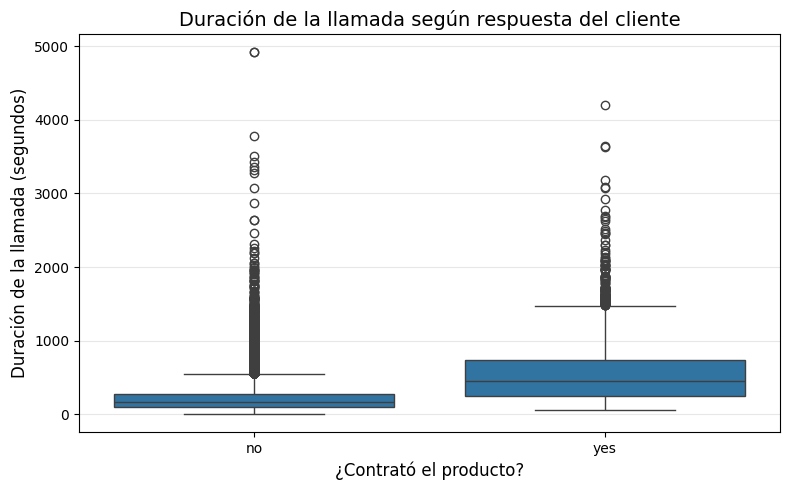

In [85]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='duration', data=df_complete)
plt.title('Duración de la llamada según respuesta del cliente', fontsize=14)
plt.xlabel('¿Contrató el producto?', fontsize=12)
plt.ylabel('Duración de la llamada (segundos)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Aqui podemos ver que las llamadas en las que contratan son mas las que las que no lo hacen, con lo cual a mayor duracion de la llamada mayor probabilidad de que se contrate.

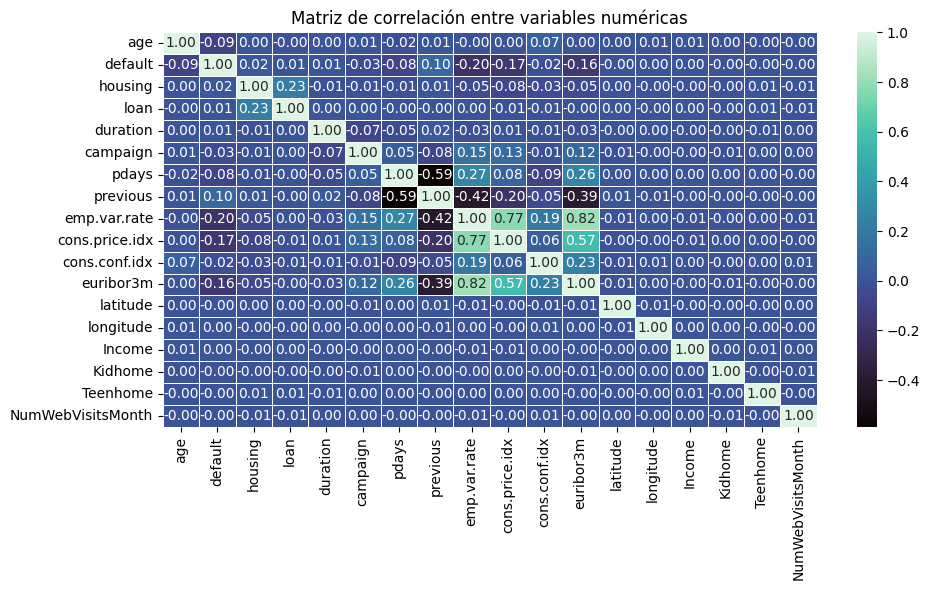

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_complete.corr(numeric_only=True), annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

### Aqui vemos que previus tiene una correlacion fuerte con pdays,esto puede indicar que si ya contactaron con el anteriormente, es probable que contacten con el en poco tiempo.

### Tambien hay correlacion fuerte entre variables economicas generales como emp.var.rate y cons.price.idx, ya que cuanta mas gente haya trabajando, mas pueden subir los precios

In [87]:
df_complete.to_csv("../output/archivo_modificado.csv", index=False)